In [62]:
import pandas as pd
import altair as alt

In [63]:
df = pd.read_csv("./_data/sales.csv")

### Most recent sales

In [64]:
df.sort_values("date", ascending=False)[[
    'date',
    'unit',
    'price',
    'square_feet',
    'price_per_square_foot'
]].head(5)

,date,unit,price,square_feet,price_per_square_foot
0,2018-06-12,527,600000,1323,453.514739
1,2018-04-11,706,598000,1348,443.620178
2,2018-02-01,409,590000,1323,445.956160
3,2018-01-24,315,615000,1509,407.554672
4,2017-12-13,804,455000,1006,452.286282


### The pace of sales

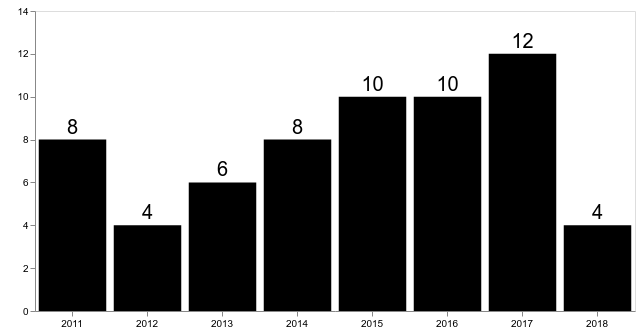

In [65]:
bars = alt.Chart(df).mark_bar(color="black").encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 14)), axis=alt.Axis(title="", grid=False))
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-12,
    size=20
).encode(
    text='count()'
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/sales-by-year.svg')

chart

### 

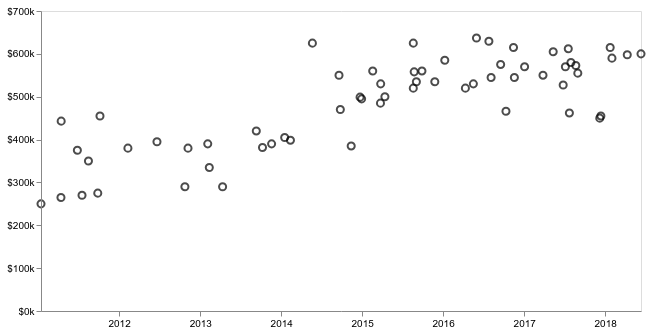

In [66]:
chart = alt.Chart(df).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-date.svg')

chart

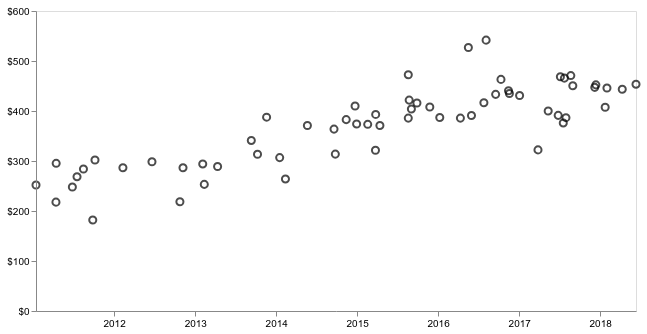

In [67]:
chart = alt.Chart(df).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 600])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-date.svg')

chart

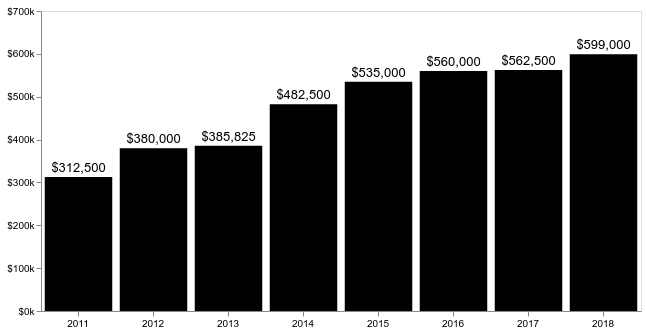

In [68]:
bars = alt.Chart(df).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-year.svg')

chart

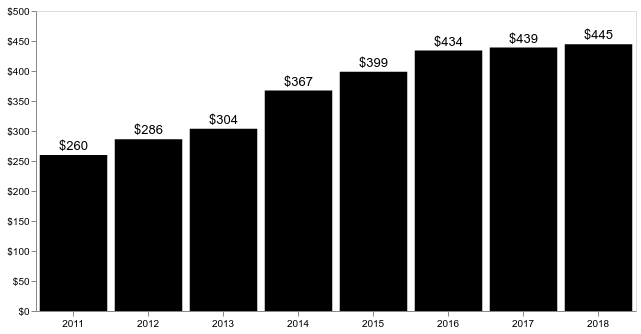

In [69]:
bars = alt.Chart(df).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 500]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price_per_square_foot):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-year.svg')

chart